In [1]:
class RandomShuffle(object):
    def __call__(self, img):
        left = img[:,:,0:14].flatten()
        right = img[:,:,14:28].flatten()
        left = left[torch.randperm(len(left))].reshape(1,28,14)
        right = right[torch.randperm(len(right))].reshape(1,28,14)
        img[:,:,0:14] = left
        img[:,:,14:28] = right
        return img

In [2]:
import torch
import torchvision

batch_size=16
norm_tsfm = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
shuffle_tsfm = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               RandomShuffle(),
                               #torchvision.transforms.Normalize((0.1307,), (0.3081,))
                             ])
train_set = torchvision.datasets.MNIST('.', train=True, download=True,
                             transform=shuffle_tsfm)
train_loader = torch.utils.data.DataLoader(train_set,
  batch_size=batch_size, shuffle=True)

test_set = torchvision.datasets.MNIST('.', train=False, download=True,
                             transform=shuffle_tsfm)
test_loader = torch.utils.data.DataLoader(test_set,
  batch_size=batch_size, shuffle=True)
#len(train_set), len(test_set), train_set[0][0].shape, train_set[0][1], test_set[0][0].shape, test_set[0][1]

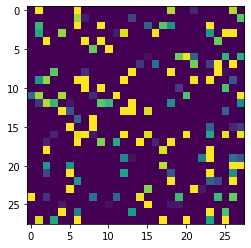

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_set[0][0][0])

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [9]:
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
epochs = 100
train_acc = torch.tensor(epochs)
test_acc = torch.tensor(epochs)
for epoch in range(epochs):
    total = 0
    correct = 0
    for i, (imgs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(imgs.reshape(-1,28*28))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    train_acc[epoch] = 100 * correct / total
    print('Train acc: ', train_acc[epoch])
    total = 0
    correct = 0
    for i, (imgs, labels) in test_loader:
        outputs = model(imgs.reshape(-1,28*28))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    test_acc[epoch] = 100 * correct / total
    print('Test acc: ', test_acc[epoch])

    
    

KeyboardInterrupt: 